# Prepare Enviroment

In [1]:
!pip install turicreate

     |████████████████████████████████| 92.0MB 43kB/s 
     |████████████████████████████████| 86.4MB 79kB/s 
     |████████████████████████████████| 3.4MB 45.7MB/s 
     |████████████████████████████████| 3.6MB 39.6MB/s 
     |████████████████████████████████| 327kB 40.1MB/s 
     |████████████████████████████████| 450kB 47.6MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 3.8MB 42.5MB/s 
     |████████████████████████████████| 18.3MB 243kB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320849 sha256=8942de0608bde1b0d945549df6a9c44cf09c98827d6903a2f112a1ba45803a4d
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for prettytable: filename=prettytable-0.7.2-cp36-none-any.whl size=13702 sha256=cf952361fe83af795393fb1da6dcbc2f5423ffc9028a7557edf4dc4e46ff467f
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb5951

In [2]:
#Autenthicate in Google to access my datasets
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import turicreate

# Load the data

In [5]:
image_train = turicreate.SFrame('/content/gdrive/My Drive/Turicreate/Week 6/image_train_data/')
image_test = turicreate.SFrame('/content/gdrive/My Drive/Turicreate/Week 6/image_test_data/')

,id,image,label,deep_features,image_array
0,24,,bird,"[0.24287176132202148, 1.0954537391662598, 0.0, 0.39362990856170654, 0.0, 0.0, 11.894915580749512, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5788496136665344, 0.4954667389392853, 2.5141289234161377, 0.0, 1.5180106163024902, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5813961029052734, 0.0, 0.0, 2.595609426498413, 2.7079553604125977, 0.0, 0.0, 0.0, 0.8509902954101562, 0.0, 0.7203489542007446, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2700355052947998, 0.0, 0.0, 0.0, 0.0, 0.08592796325683594, 0.0, 0.7010231018066406, 0.0, 0.0, 0.0, 0.0, 0.024805665016174316, 0.0, 0.0, 0.17549043893814087, 0.0, 0.0, 0.0, 0.0, 0.0, 2.392784595489502, 0.0, 0.0, 4.471865653991699, 0.0, 1.6358323097229004, 0.0, 4.417484760284424, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4117904901504517, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[73.0, 77.0, 58.0, 71.0, 68.0, 50.0, 77.0, 69.0, 44.0, 120.0, 116.0, 83.0, 125.0, 120.0, 90.0, 155.0, 148.0, 117.0, 147.0, 152.0, 106.0, 133.0, 136.0, 92.0, 112.0, 101.0, 75.0, 100.0, 84.0, 68.0, 100.0, 78.0, 74.0, 69.0, 49.0, 51.0, 22.0, 16.0, 13.0, 35.0, 27.0, 24.0, 52.0, 40.0, 40.0, 70.0, 55.0, 54.0, 117.0, 97.0, 89.0, 122.0, 101.0, 99.0, 103.0, 85.0, 88.0, 88.0, 74.0, 73.0, 68.0, 59.0, 52.0, 72.0, 65.0, 52.0, 82.0, 73.0, 60.0, 84.0, 72.0, 68.0, 84.0, 67.0, 73.0, 77.0, 56.0, 65.0, 93.0, 75.0, 81.0, 117.0, 102.0, 98.0, 174.0, 171.0, 146.0, 183.0, 210.0, 149.0, 180.0, 214.0, 143.0, 185.0, 225.0, 144.0, 73.0, 74.0, 52.0, 75.0, ...]"
1,33,,cat,"[0.5250879526138306, 0.0, 0.0, 0.0, 0.0, 0.0, 9.948286056518555, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0126363039016724, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1646251678466797, 0.0, 0.0, 0.0, 0.0, 0.4600375294685364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3580564260482788, 0.0, 0.0, 3.517725944519043, 2.9159154891967773, 0.0, 0.0, 0.0, 0.0, 0.4551548957824707, 0.0, 0.0, 0.0, 0.9146482944488525, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8120278716087341, 0.04379773139953613, 0.0, 1.6515014171600342, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3530466556549072, 0.0, 0.0, 1.4851171970367432, 0.0, 0.0, 0.0, 1.5763869285583496, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.6830389499664307, 1.643679141998291, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[7.0, 5.0, 8.0, 7.0, 5.0, 8.0, 5.0, 4.0, 6.0, 7.0, 4.0, 7.0, 11.0, 5.0, 9.0, 11.0, 5.0, 9.0, 17.0, 11.0, 15.0, 25.0, 19.0, 23.0, 18.0, 9.0, 17.0, 9.0, 1.0, 9.0, 13.0, 7.0, 15.0, 24.0, 19.0, 27.0, 21.0, 19.0, 25.0, 34.0, 32.0, 35.0, 52.0, 43.0, 42.0, 40.0, 27.0, 26.0, 19.0, 9.0, 10.0, 11.0, 6.0, 10.0, 20.0, 16.0, 18.0, 36.0, 29.0, 28.0, 25.0, 20.0, 22.0, 23.0, 19.0, 22.0, 32.0, 21.0, 22.0, 33.0, 26.0, 29.0, 58.0, 57.0, 61.0, 73.0, 75.0, 81.0, 83.0, 91.0, 94.0, 61.0, 68.0, 66.0, 69.0, 71.0, 66.0, 82.0, 84.0, 78.0, 80.0, 85.0, 81.0, 69.0, 73.0, 68.0, 6.0, 4.0, 8.0, 6.0, ...]"
2,36,,cat,"[0.5660159587860107, 0.0, 0.0, 0.0, 0.0, 0.0, 9.997204780578613, 0.0, 0.0, 0.0, 1.38345205783844, 0.0, 0.7764788269996643, 0.0, 0.0, 0.044802725315093994, 0.22744053602218628, 0.5177360773086548, 0.0, 1.5863749980926514, 0.0, 1.238269329071045, 0.0, 0.6377935409545898, 1.8000781536102295, 1.9250504970550537, 0.06807559728622437, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.452914237976074, 0.7830307483673096, 0.0, 0.0, 0.014504671096801758, 0.0, 0.0, 1.1913495063781738, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8588502407073975, 0.23833894729614258, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4233408570289612, 0.0, 0.9965428113937378, 2.3011531829833984, 0.0, 0.0, 0.0, 0.0, 0.0, 2.076474189758301, 0.07118624448776245, 0.0, 1.7414445877075195, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3547537922859192, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.167968273162842, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[169.0, 122.0, 65.0, 131.0, 108.0, 75.0, 193.0, 196.0, 192.0, 218.0, 221.0, 222.0, 211.0, 215.0, 216.0, 206.0, 214.0, 216.0, 200.0, 211.0, 212.0, 193.0, 206.0
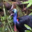
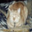
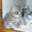

In [10]:
image_train[0:3].explore() #the deep features were previusly add it but for new data sets, it cant be added with the code below

# Train model using deep features
the deep features were previusly add it but for new data sets, it cant be added with the code below.


In [13]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_train['deep_features'] = deep_learning_model.extract_features(image_train)

# Train a logistic classifier with the Deep Featrues

In [14]:
deep_features_model = turicreate.logistic_classifier.create(image_train,
                                                           target='label',
                                                           features = ['deep_features'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients      : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 1.486780     | 0.728992          | 0.673267            |

| 1         | 6        | 0.250000  | 2.204062     | 0.760504          | 0.811881            |

| 2         | 13       | 3.998250  | 3.556133     | 0.762605          | 0.722772            |

| 3         | 15       | 2.921258  | 4.111977     | 0.405987          | 0.346535            |

| 4         | 17       | 1.162182  | 4.665266     | 0.747899          | 0.752475            |

| 9         | 24       | 1.000000  | 6.970897     | 0.910714          | 0.831683            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Test the model

,SArray
0,
1,
2,

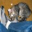
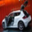
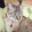

In [15]:
image_test[0:3]['image'].explore()

In [16]:
deep_features_model.predict(image_test[0:3])

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

,SArray
0,
1,
2,

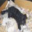
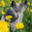
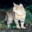

dtype: str
Rows: 3
['dog', 'bird', 'dog']

In [19]:
image_test[100:103]['image'].explore()
deep_features_model.predict(image_test[100:103])

# Evaluate the accuarcy of the model

In [17]:
deep_features_model.evaluate(image_test)

{'accuracy': 0.795, 'auc': 0.9416357916666668, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |       cat       |  182  |
 |     bird     |       bird      |  816  |
 |  automobile  |       bird      |   18  |
 |  automobile  |    automobile   |  955  |
 |     bird     |    automobile   |   11  |
 |     cat      |       cat       |  653  |
 |     bird     |       cat       |  114  |
 |     cat      |       dog       |  251  |
 |     dog      |       dog       |  756  |
 |     dog      |    automobile   |   9   |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'f1_score': 0.795350996078574, 'log_loss': 0.6144339230124309, 'precision': 0.79